In [100]:
import pandas as pd
import numpy as np

In [113]:
# Import the data
data = pd.read_csv("norm_data__non_log.txt",sep='\t').T
label = pd.read_csv("sample_list.csv",sep=';')

# Log transform on the data
# data = data.apply(np.sqrt)

# Conversion of string to bool
mapping = {'Non-LCa':-1,'LCa':1}
target = label.Disease.map(mapping).values

In [123]:
data.shape

(3046, 1183)

In [106]:
data.corr()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1174,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183
feature-0001,1.000000,-0.162019,-0.270982,0.231844,0.276109,-0.080073,0.020711,0.120670,0.003605,-0.226785,...,0.104901,0.207558,-0.002601,-0.060746,-0.153709,0.270381,-0.154201,-0.013893,0.298080,-0.196630
feature-0002,-0.162019,1.000000,0.016989,-0.055744,-0.123820,0.084648,-0.001336,-0.094219,-0.205186,0.121345,...,-0.101661,-0.098596,-0.117338,0.194294,0.162699,-0.083302,-0.076821,0.163717,-0.153074,0.017137
feature-0003,-0.270982,0.016989,1.000000,-0.381267,-0.231172,-0.116466,-0.171645,-0.265110,0.060694,0.538300,...,0.053094,-0.077425,-0.017295,0.009773,0.247342,-0.311601,-0.029611,-0.340884,-0.262368,0.488210
feature-0004,0.231844,-0.055744,-0.381267,1.000000,0.076944,-0.013965,0.051956,0.399024,0.005135,-0.398457,...,-0.085354,0.114671,0.022161,0.075196,-0.093196,0.378319,-0.251773,0.265598,0.420810,-0.259924
feature-0005,0.276109,-0.123820,-0.231172,0.076944,1.000000,0.065451,0.168071,-0.071778,0.054055,-0.076763,...,0.076112,0.013823,-0.032179,-0.107223,-0.091902,-0.056008,-0.037983,0.255595,0.065516,0.008124
feature-0006,-0.080073,0.084648,-0.116466,-0.013965,0.065451,1.000000,0.144362,-0.143682,-0.028095,0.093019,...,-0.150566,-0.141473,0.047300,-0.010370,-0.165695,-0.115587,-0.071957,0.272168,-0.207497,-0.111384
feature-0007,0.020711,-0.001336,-0.171645,0.051956,0.168071,0.144362,1.000000,-0.117545,0.031491,0.029112,...,-0.054329,-0.143980,0.127273,-0.069147,-0.221824,-0.087922,-0.103289,0.325343,-0.144602,-0.185730
feature-0008,0.120670,-0.094219,-0.265110,0.399024,-0.071778,-0.143682,-0.117545,1.000000,-0.007201,-0.400251,...,0.059167,0.207592,-0.089949,-0.050065,-0.088178,0.538734,-0.071030,0.013888,0.572501,-0.192638
feature-0009,0.003605,-0.205186,0.060694,0.005135,0.054055,-0.028095,0.031491,-0.007201,1.000000,0.017581,...,0.061851,-0.004884,0.159385,-0.099424,-0.060228,-0.009102,-0.072070,-0.058162,-0.009729,-0.024513
feature-0010,-0.226785,0.121345,0.538300,-0.398457,-0.076763,0.093019,0.029112,-0.400251,0.017581,1.000000,...,-0.044644,-0.185329,0.028014,0.104839,0.100996,-0.484595,-0.047022,-0.008305,-0.440043,0.225327


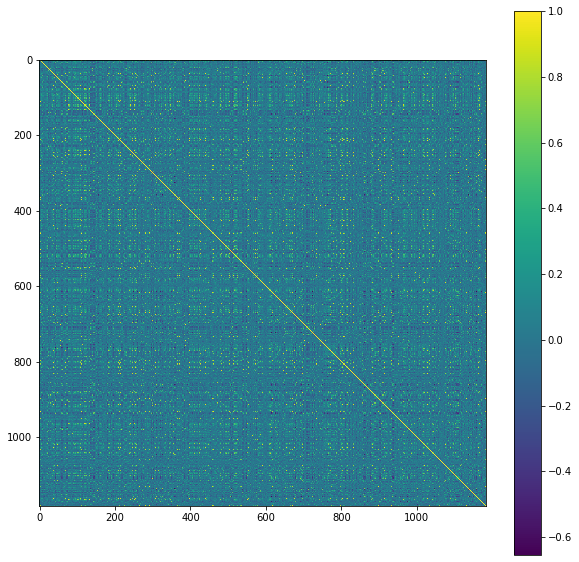

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
c = ax.imshow(data.corr())
fig.colorbar(c,ax=ax)
plt.savefig('heatmap.png',dpi=300)
plt.show()

In [513]:
# Parameter setup
cv_splits = 100 # Number of folds
test_size = 0.25 # Size of test data
random_state = 5 # Seed the model / splits to compare models

In [517]:
# Set up splitting
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit, LeaveOneOut
skf = StratifiedShuffleSplit(n_splits=cv_splits,test_size=test_size,random_state=random_state)
loo = LeaveOneOut()

In [518]:
# Feature
from sklearn.feature_selection import SelectFdr, chi2, SelectFromModel,f_classif,SelectKBest,mutual_info_classif
from sklearn.feature_selection import SelectPercentile, chi2
# select = LogisticRegression(class_weight='balanced')
data = SelectPercentile(chi2,percentile=70).fit_transform(data,target)
# data = SelectFromModel(select).fit_transform(data,target)

In [520]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
# Establish variables
precision = []
accuracy = []
recall = []
auc = []
y_pred_loo = []

data.shape
# Begin CV LR
for train, test in loo.split(data,target):
    
    # Splitting
    X_train,X_test,y_train,y_test = data[train],data[test],target[train],target[test]
    X_train, y_train = SMOTE(sampling_strategy='minority',random_state=random_state).fit_resample(X_train,y_train)
     
    # Logistic regression, fitting intercept automatically. No standardisation needed
    model = SVC(class_weight='balanced',C=100,gamma=0.001,kernel='rbf').fit(X_train,y_train)

    # Prediction of the model
    y_pred = model.predict(X_test)
    
    # LOOCV
    y_pred_loo.append(y_pred)
    
#     recall.append(recall_score(y_test,y_pred))
#     precision.append(precision_score(y_test,y_pred))
#     accuracy.append(accuracy_score(y_test,y_pred))
#      auc.append(roc_auc_score(y_test,y_pred))


In [527]:
from sklearn.metrics import classification_report 
print(classification_report(target,y_pred_loo))

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99      2440
           1       0.95      0.94      0.94       606

    accuracy                           0.98      3046
   macro avg       0.97      0.96      0.96      3046
weighted avg       0.98      0.98      0.98      3046



In [ ]:
# Size of the training and test sizes
print("TRAIN SIZE {} , TEST SIZE {}".format(X_train.shape,X_test.shape))

In [ ]:
print("PRECISION MEAN {}".format(np.mean(precision)))
print("RECALL MEAN {}".format(np.mean(recall)))
print("ACCURACY MEAN {}".format(np.mean(accuracy)))
print("AUC MEAN {}".format(np.mean(auc)))

In [ ]:
print('FOLD-{} PRECISION {}\n'.format([x for x in range(len(precision))],[x for x in precision]))
print('FOLD-{} RECALL {}\n'.format([x for x in range(len(precision))],[x for x in recall]))
print('FOLD-{} ACCURACY {}\n'.format([x for x in range(len(precision))],[x for x in accuracy]))
print('FOLD-{} AUC {}\n'.format([x for x in range(len(precision))],[x for x in auc]))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(precision,label='Precision')
plt.plot(recall,label='Recall')
plt.plot(accuracy,label='Accuracy')
plt.plot(auc,label='AUC')
plt.legend()
plt.show()

In [484]:
# Parameter setup INDUCTION
cv_splits = 2 # Number of folds
test_size = 0.25 # Size of test data
random_state = 17 # Seed the model / splits to compare models

In [18]:
# Set up splitting
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
skf = StratifiedShuffleSplit(n_splits=cv_splits,test_size=test_size,random_state=50)

In [34]:
# Induction
# Establish variables
precision, precision_full = 0,0
accuracy, accuracy_full = 0,0
recall, recall_full = 0,0
auc, auc_full = 0,0


# Begin CV LR


rec,prec,acc,aucc = [],[],[],[]

# Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=test_size,random_state=random_state)

# Logistic regression, fitting intercept automatically. No standardisation needed
model = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

# Prediction of the model
y_pred = model.predict(X_test)

recall_full = recall_score(y_test,y_pred)
precision_full = precision_score(y_test,y_pred)
accuracy_full = accuracy_score(y_test,y_pred)
auc_full = roc_auc_score(y_test,y_pred)

# Select 10 best features
model_sub = SVC(class_weight='balanced',C=10,gamma=0.01,kernel='rbf')
n_comps = range(1,600,10)
for i in n_comps:
    features = SelectFromModel(model, max_features=i,prefit=True)
    model_sub.fit(X_train[:,~features.get_support()],y_train)
    y_pred = model_sub.predict(X_test[:,~features.get_support()])
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    auc = roc_auc_score(y_test,y_pred)

#         print("NUMBER OF FEATURES REMOVED {} ".format(i))
#         print("RECALL DIFF {}".format(np.abs(recall - recall_full)))
#         print("PRECISION DIFF {}".format(np.abs(precision - precision_full)))
#         print("ACCURACY DIFF {}".format(np.abs(accuracy - accuracy_full)))
#         print("AUC DIF {}".format(np.abs(auc - auc_full)))

    rec.append(np.abs(recall - recall_full))
    prec.append(np.abs(precision - precision_full))
    acc.append(np.abs(accuracy - accuracy_full))
    aucc.append(np.abs(auc - auc_full))



    

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


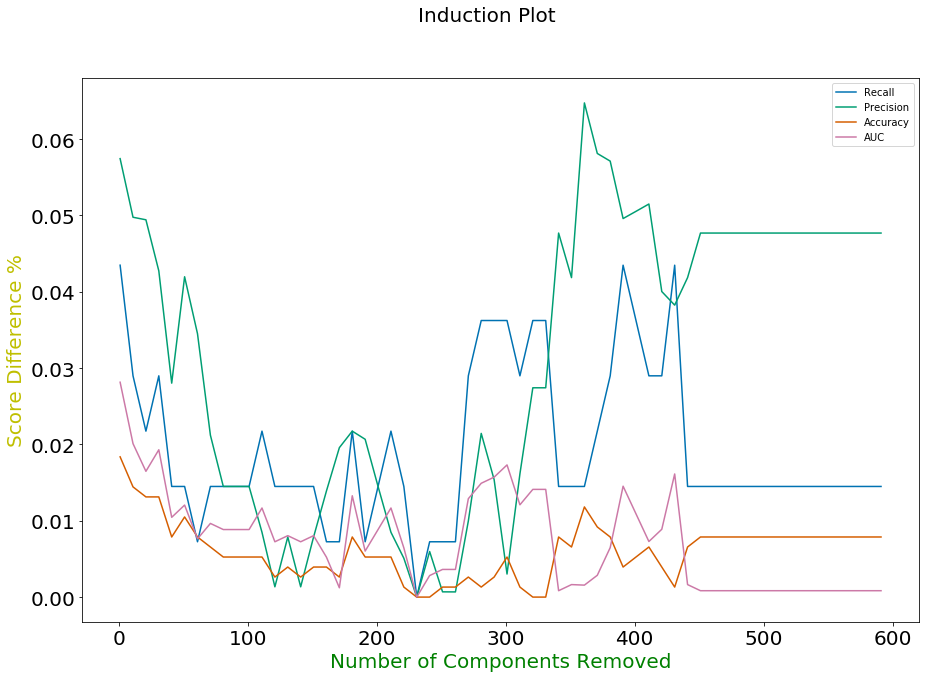

In [35]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
plt.style.use(['seaborn-colorblind'])
title = fig.suptitle('Induction Plot', fontsize=20,)
label_x = plt.xlabel('Number of Components Removed', fontsize=20)
label_y = plt.ylabel('Score Difference %', fontsize=20)
plt.setp(title, color='black') 
plt.setp(label_x, color='g') 
plt.setp(label_y, color='y') 

plt.plot(n_comps,rec,label='Recall')
plt.plot(n_comps,prec,label='Precision')
plt.plot(n_comps,acc,label='Accuracy')
plt.plot(n_comps,aucc,label='AUC')

plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [145]:
# Testing with Multi-Tasking 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=test_size,random_state=random_state)

# FEATURE SELECT FOR LR and use NON for RF
model_feature_select = LogisticRegression(class_weight='balanced',solver='liblinear').fit(X_train,y_train)
features = SelectFromModel(model_feature_select, max_features=420,prefit=True)

# fit models with features
model_lr = LogisticRegression(class_weight='balanced',solver='liblinear').fit(X_train[:,features.get_support()],y_train)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_rf = scaler.transform(X_train)
X_test_rf = scaler.transform(X_test)
from imblearn.over_sampling import ADASYN,SMOTE
ada = SMOTE()
X_train_rf, y_train_rf = ada.fit_resample(X_train_rf[:,features.get_support()],y_train)
model_rf = RandomForestClassifier(class_weight='balanced').fit(X_train_rf,y_train_rf)

# Pred
y_lr = model_lr.predict(X_test[:,features.get_support()])
y_rf = model_rf.predict(X_test_rf[:,features.get_support()])

# Score 
from sklearn.metrics import classification_report
print("LR: {}".format(classification_report(y_test,y_lr)))
print("RF: {}".format(classification_report(y_test,y_rf)))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LR:               precision    recall  f1-score   support

           0       0.98      0.91      0.94       624
           1       0.69      0.91      0.79       138

    accuracy                           0.91       762
   macro avg       0.84      0.91      0.86       762
weighted avg       0.93      0.91      0.92       762

RF:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.89      0.71      0.79       138

    accuracy                           0.93       762
   macro avg       0.91      0.85      0.87       762
weighted avg       0.93      0.93      0.93       762



In [37]:
# PCA on feature splits
from sklearn.decomposition import KernelPCA,PCA 
from sklearn.preprocessing import StandardScaler

data_new = StandardScaler().fit_transform(data)
df = pd.DataFrame(data)
X = PCA(n_components=4).fit_transform(data_new)

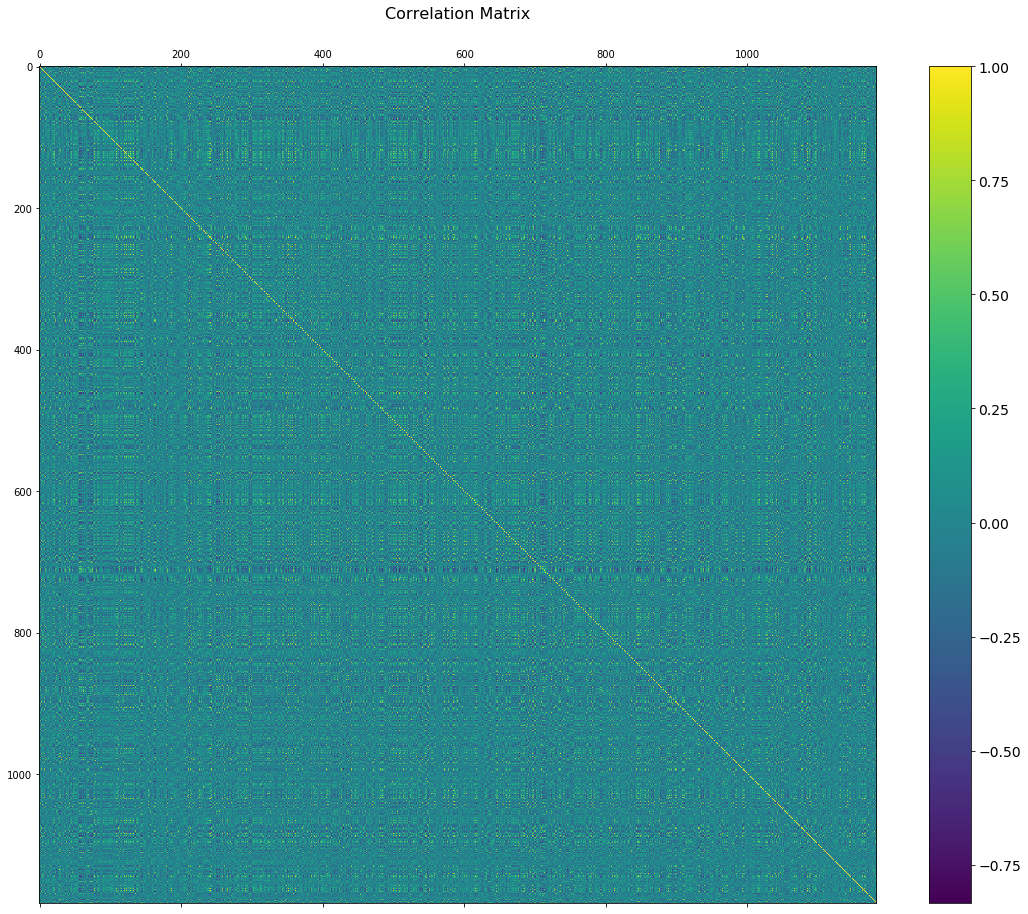

In [39]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [97]:
from sklearn.manifold import MDS, TSNE, SpectralEmbedding, Isomap
# XX = MDS(n_components=2).fit_transform(data)
X = TSNE(n_components=2).fit_transform(data)

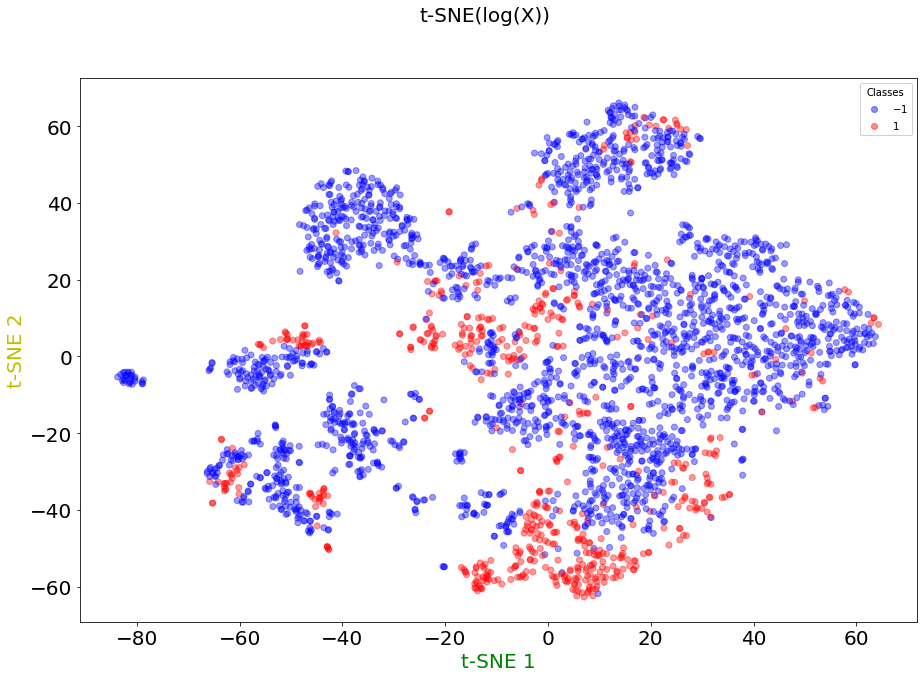

In [98]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
plt.style.use(['seaborn-colorblind'])
title = fig.suptitle('t-SNE(log(X))', fontsize=20,)
label_x = plt.xlabel('t-SNE 1', fontsize=20)
label_y = plt.ylabel('t-SNE 2', fontsize=20)
plt.setp(title, color='black') 
plt.setp(label_x, color='g') 
plt.setp(label_y, color='y') 
scatter = ax.scatter(X[:,0],X[:,1],c=target,cmap='bwr',alpha=0.4)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('tSNE.png',dpi=300)
plt.show()

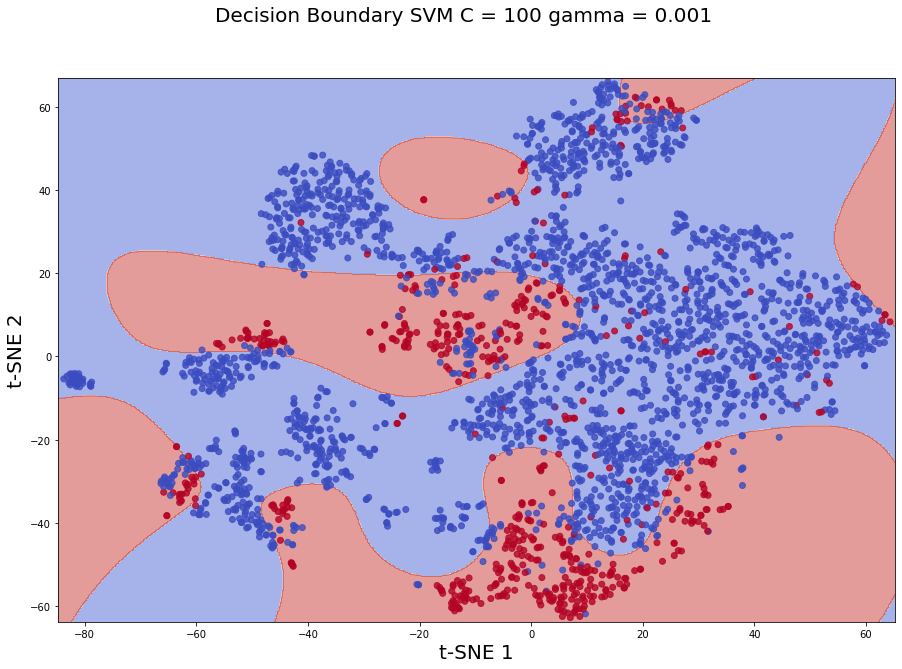

In [99]:
from sklearn.svm import SVC
# initialize algorithms and data with random
model = SVC(class_weight='balanced',C=100,gamma=0.001,kernel='rbf')
model.fit(X,target)

plt.style.use(['seaborn-colorblind'])
# generate grid for plotting
h = 0.2
x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

# create decision boundary plot
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig,ax = plt.subplots(figsize=(15,10))
plt.style.use(['seaborn-colorblind'])
title = fig.suptitle('Decision Boundary SVM C = 100 gamma = 0.001', fontsize=20,)
label_x = plt.xlabel('t-SNE 1', fontsize=20)
label_y = plt.ylabel('t-SNE 2', fontsize=20)
ax.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X[:,0],X[:,1],c=target,alpha=0.8,cmap=plt.cm.coolwarm)
plt.savefig('decisionb.png',dpi=300)
plt.show()